# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'axes.axisbelow': True,
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'font.size':15,
    'savefig.directory':'./Images'
})

### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...

### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

#### Soluzione
Per risolvere il problema del commesso viaggiatore che vuole minimizzare il percorso che unisce N città si fa uso degli algoritmi genetici. Nel nostro caso i geni sono le varie città, i cromososmi sono i percorsi compiuti per unire le città e le popolazioni sono un insieme di vari percorsi (cromosomi) da cui alla fine si prenderà quello più corto.

In seguito viene spiegata l'idea dell'algoritmo e poi viene esposto come è stato realizzato attraverso un'analisi più dettagliata della struttura del codice.

##### Idea dell'algoritmo
Partendo da una popolazione generata casualmente si applicano i seguenti passaggi:
1. i cromosomi nella popolazione vengono messi in ordine in base alla loss (descrescente) che è calcolata come $ L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}| $
2. viene creata una nuova popolazione a partire dalla precedente in questo modo:
    - vengono selezionati due cromosomi (percorsi) con un algoritmo di selezione in cui è più probabile scegliere cromosomi con la loss più bassa
    - a questi due cromosomi viene applicato il crossover con una probabilità $p_{crossover}$
    - i nuovi cromosomi (o una copia di quelli vecchi in base a $p_{crossover}$) vengono aggiunti alla nuova popolazione
    - si ripete questo procedimento finchè tutta la popolazione è completata
4. viene applicata la mutazione a tutti i cromosomi della nuova popolazione, con una certa probabilità
5. vengono ripetuti tutti i passaggi alla nuova popolazione per un numero di volte pari a $N_{generation}$

Alla fine di ogni passaggio di generazione viene salvata la loss del cromosoma con percorso più corto e la media delle loss della metà migliore della popolazione (quindi la seconda metà dopo l'ordinamento in ordine di loss descrescente).

##### Struttura del codice

Per realizzare questo algoritmo ho usato la libreria di armadillo e quindi tutti i vettori che ho usato sono dei  ``` vec ``` di ``` armadillo ```.
Ho creato 3 classi:
- Classe ``` City() ```: ogni città è un ```vec``` di dimensione 3 e contiene l'id e le coordinate x e y della città. Questa classe contine dei metodi per accedere/settare delle caratteristiche della città (posizione e id) e per eseguire delle operazioni tra le varie componeti della città.
- Classe ``` Chromosome() ```: ha come classe figlia la classe ``` City()```, questo significa che un cromosoma è un vettore di città. Questa classe contiene:
    - i metodi per inizializzare il sistema in modo che le città vengano disposte su un cerchio o nel quadrato;
    - un metodo ``` check()``` che controlla che ogni cammino rispetti i constraint, cioè che il percorso parta sempre dalla stessa città e che non visiti una città più di una volta;
    - i metodi per il calcolo della loss;
    - i metodi per i vari tipi di mutazione che può subire un cammino (permutazione di due città, permutazione di m città contigue, inversione di m città contigue e shift di n posti di m città contigue);
    - un metodo per scrivere la configurazione.
- Classe ``` Population() ```: ha come classe figlia la classe cromosoma, quindi una popolazione è un vettore di cromosomi. Questa classe contiene:
    - un metodo per inizializzare il sistema che richiama i metodi di inizializzazzione della classe cromosoma che stabiliscono in che tipo di configurazione stiamo lavorando (cerchio o quadrato);
    - un metodo per creare la prima popolazione che viene creata applicando $N$ permutazione al cromosoma in cui le città sono ordinate in base al loro ```_id```
        ``` c++
        void Population::first_popul(){
            for(int j = 1; j<_nchrom; j++){
                _chromosome(j) = _chromosome(0);
                for(int i = 0; i< 2*34; i++){
                    _chromosome(j).permutation(); 
                }
            }
        }
        ```
    - il metodo per ordinare i cromosomi in ordine di loss descresente:
        ``` c++
        void Population::sorting() {
            vec loss(_nchrom);
                for(int i = 0; i < _nchrom; i++) {
                    loss(i)=(_chromosome(i).loss()); 
                }
            field<Chromosome> new_chromosome(_nchrom);
            uvec sorting = sort_index(loss, "descend");
                for(int i = 0; i < _nchrom; i++) {
                    new_chromosome(i) = _chromosome(sorting(i));
                } 
            _chromosome = new_chromosome;
        }
        ```
    - il metodo per selezionare i cromosomi prima del crossover che seleziona l'indice secondo la seguente formula: $j= int(M \times r^{0.4})$ in modo che i cromosomi con loss più bassa abbiano più probabilità di essere selezionati;
    - il metodo che muta tutti i cromosomi di una popolazione con i tipi di mutazione implementati nella classe cromosoma. Tutti i cromosomi vanno incontro a mutazione con una probabilità propria di ciscun tipo di mutazione;
    - il metodo per fare il crossover: esso consiste nel tagliare i due cromosomi selezionati in una posizione e completare la seconda parte (dopo il taglio) con le città mancanti nell'ordine presente nell'altro cromosoma. La selezione dei cromosomi su cui fare il crossover, secondo l'algoritmo di selezione spiegato prima, viene fatta direttamente nel metodo del crossver. Questo metodo ha come argomenti due cromosomi che nel main verranno passati vuoti e che dentro al crossover erranno riempiti come spiegato.



Innanzitutto ci poniamo nel caso in cui le $34$ città sono collocate casualmente su una _circonferenza_ di raggio $1$. Il percorso iniziale che collega le città è quello rosso in figura e dopo una serie di passi di ottimizzazione in cui viene ripetuto l'algoritmo spiegato sopra si raggiunge la configurazione finale (blu in figura) in cui è minimizzata la funzione costo che nel nosto caso è la $L_1$.
Poi ripetiamo la simulazione collocando le città casulamente all'interno di un quadrato di lato $1$.

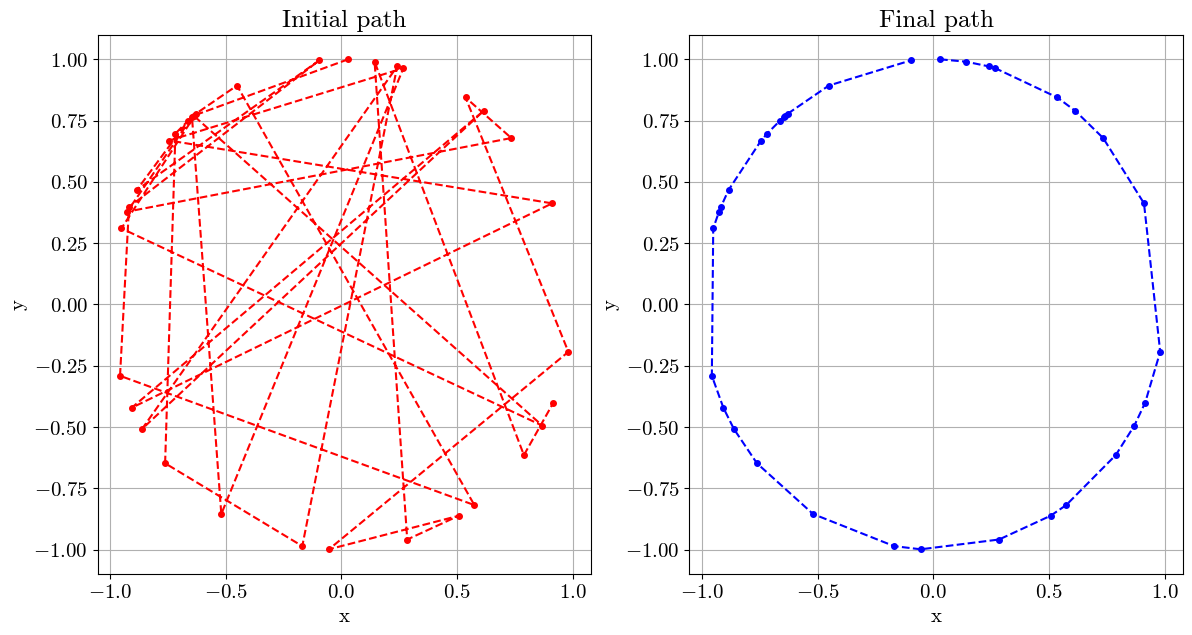

In [2]:
#CERCHIO
best = np.loadtxt("OUTPUT/CIRCLE/best_config_iniziale.dat")
x1 = best[:,1]
y1 = best[:,2]

medio = np.loadtxt("OUTPUT/CIRCLE/best_config.dat")
x = medio[:,1]
y = medio[:,2]

plt.figure(1,figsize=(14,7))
plt.subplot(1,2,1)
plt.plot(x1,y1,'o',color='red', linestyle = '--', markersize = 4)
plt.title('Initial path')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x,y,'o',color='blue', linestyle = '--', markersize = 4)
plt.title('Final path')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)


plt.show()

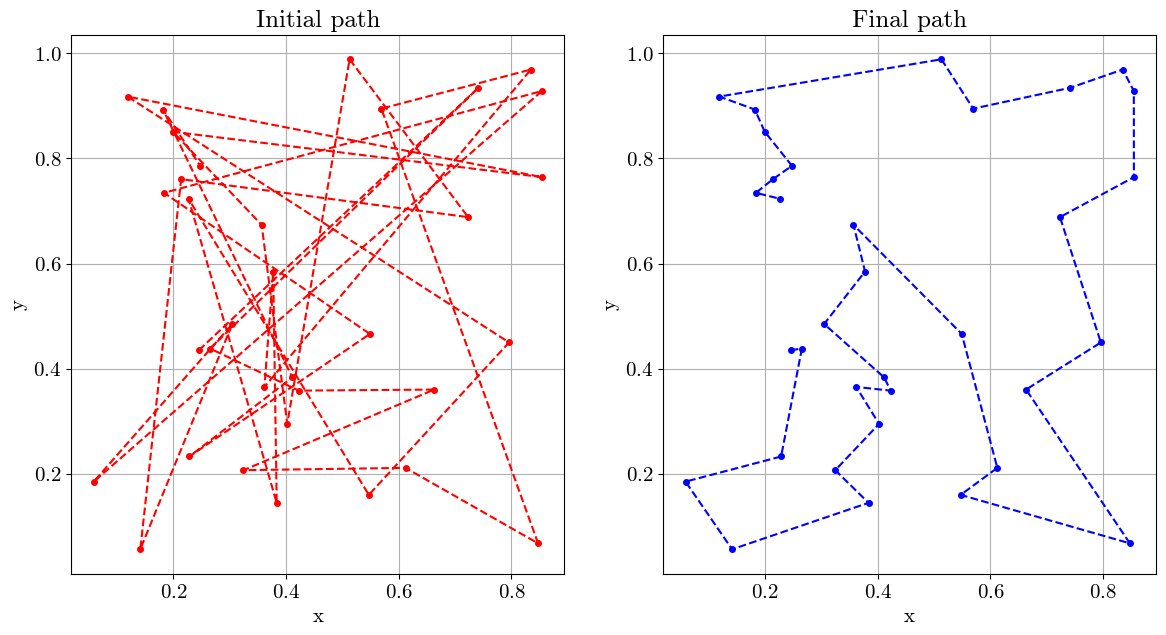

In [3]:
#QUADRATO
config_iniz = np.loadtxt("OUTPUT/SQUARE/best_config_iniziale.dat")
x1 = config_iniz[:,1]
y1 = config_iniz[:,2]

final_config = np.loadtxt("OUTPUT/SQUARE/best_config.dat")
x = final_config[:,1]
y = final_config[:,2]

plt.figure(1,figsize=(14,7))
plt.subplot(1,2,1)
plt.plot(x1,y1,'o',color='red', linestyle = '--', markersize = 4)
plt.title('Initial path')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x,y,'o',color='blue', linestyle = '--', markersize = 4)
plt.title('Final path')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)


plt.show()

Studiamo anche l'andamento della funzione costo all'aumentare del numero di generazioni $(N_{generations})$. Valutiamo $L_1$ sia per il cammino migliore (_best path_) di ogni generazione sia il valor medio della metà migliore (_best half_) della popolazione.
In ogni caso di aspettiamoc che questi andamenti siano decrescenti perchè l'algormitomo genetico è pensato in modo tale da abbassare la loss ad ogni passo successivo.
Inoltre nel caso della circonferenza ci aspettiamo che $L_1$ tenda a $2\pi$ che è il perimetro della circonferenza ed è esattamente quello che otteniamo.

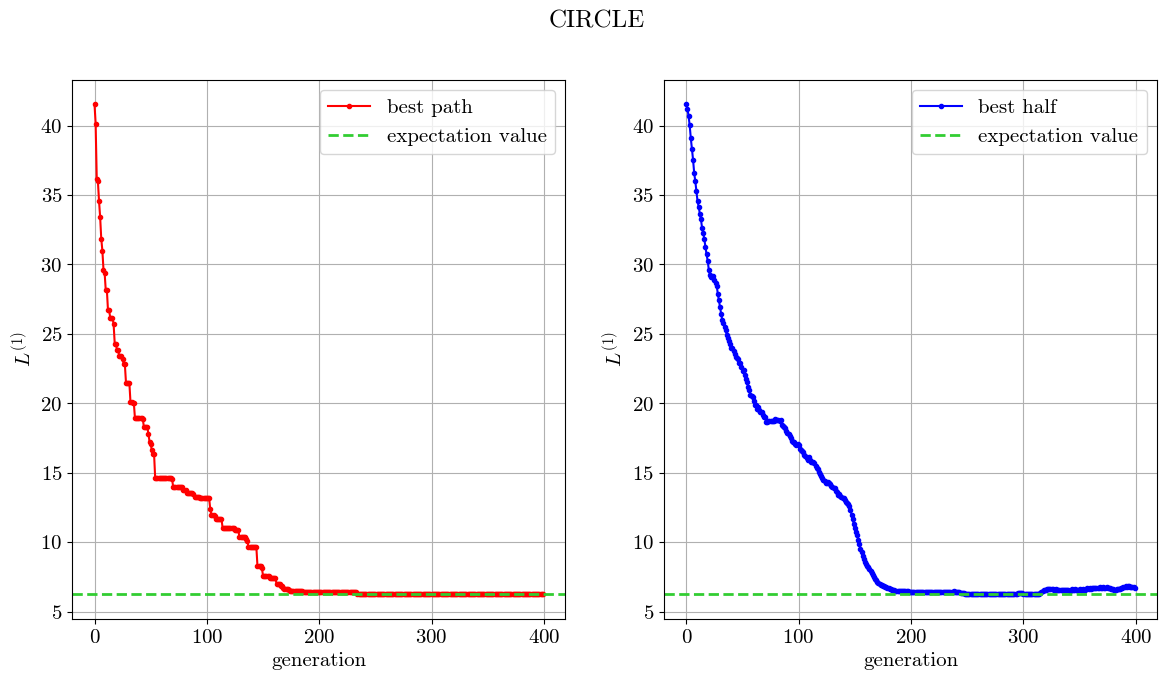

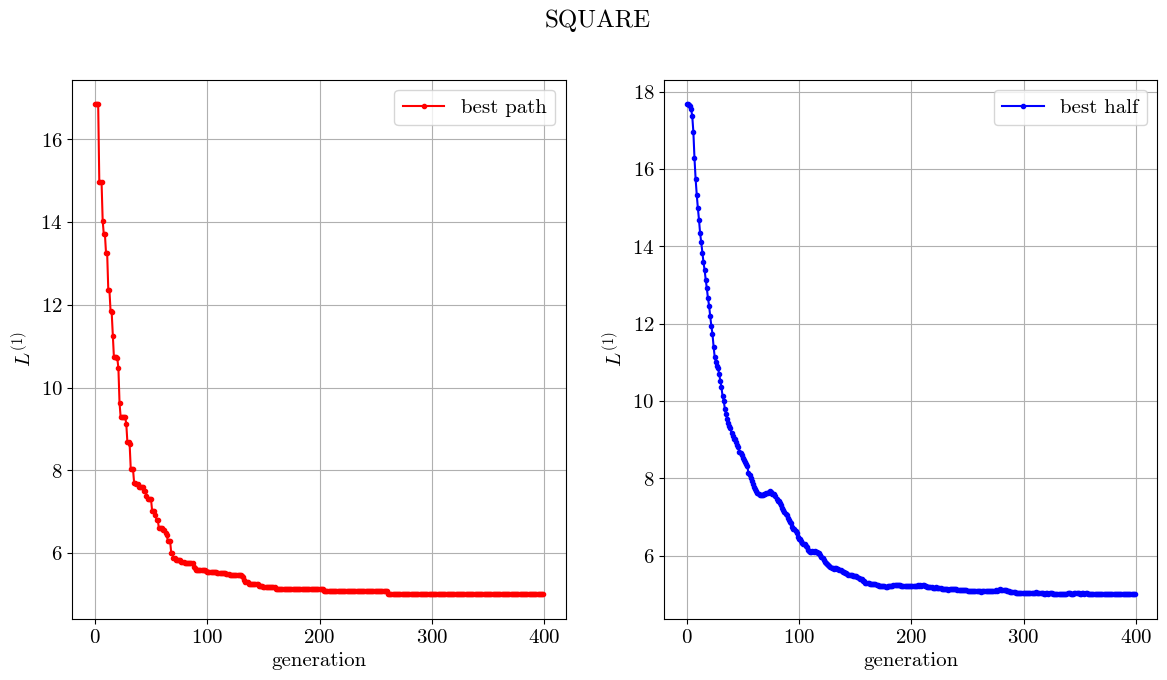

In [4]:
#CERCHIO
best1 = np.loadtxt("OUTPUT/CIRCLE/L1_best.dat")
x1 = best1[:,0]
y1 = best1[:,1]

medio1 = np.loadtxt("OUTPUT/CIRCLE/L1_medio.dat")
x = medio1[:,0]
y = medio1[:,1]

fig1 = plt.figure(1,figsize=(14,7))
fig1.suptitle('CIRCLE')
plt.subplot(1,2,1)
plt.plot(x1,y1,'o',color='red', linestyle = '-', markersize = 3, label = 'best path')
plt.axhline(y=2*math.pi, color='limegreen', linestyle='--', linewidth = 2, label = 'expectation value')
plt.xlabel('generation')
plt.ylabel('$ L^{(1)}$')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(x,y,'o',color='blue', linestyle = '-', markersize = 3, label = 'best half')
plt.axhline(y=2*math.pi, color='limegreen', linestyle='--', linewidth = 2, label = 'expectation value')
plt.xlabel('generation')
plt.ylabel('$L^{(1)}$')
plt.grid(True)
plt.legend()

#QUADRATO
best2 = np.loadtxt("OUTPUT/SQUARE/L1_best.dat")
x2 = best2[:,0]
y2 = best2[:,1]

medio2 = np.loadtxt("OUTPUT/SQUARE/L1_medio.dat")
x3 = medio2[:,0]
y3 = medio2[:,1]

fig2 = plt.figure(2,figsize=(14,7))
fig2.suptitle('SQUARE')
plt.subplot(1,2,1)
plt.plot(x2,y2,'o',color='red', linestyle = '-', markersize = 3, label = 'best path')
#plt.axhline(y=4, color='limegreen', linestyle='--', linewidth = 2, label = 'expectation value')
plt.xlabel('generation')
plt.ylabel('$L^{(1)}$')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(x3,y3,'o',color='blue', linestyle = '-', markersize = 3, label = 'best half')
#plt.axhline(y=4, color='limegreen', linestyle='--', linewidth = 2, label = 'expectation value')
plt.xlabel('generation')
plt.ylabel('$L^{(1)}$')
plt.grid(True)
plt.legend()

plt.show()

Parametri della simulazione:
- $N_{city} = 34$ (numero di città generate casualmente nelle due config)
- $N_{chromosome} = 400$ (numero di cromosomi in una generazione)
- $N_{generations} = 400$
- $p_{crossover} = 80\%$

Probabilità delle mutazioni:
- $p_{permutation} = 15\%$
- $p_{permutation_m} = 10\%$
- $p_{shift} = 20\%$
- $p_{inversion} = 20\%$
